In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165) 
  
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 
  
# metadata 
print(concrete_compressive_strength.metadata) 
  
# variable information 
print(concrete_compressive_strength.variables) 


{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 383, 'type': 'NATIVE', 'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'venue': 'C

In [3]:
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [4]:
y

,Concrete compressive strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
...,...
1025,44.28
1026,31.18
1027,23.70
1028,32.77


In [5]:
concrete_compressive_strength

{'data': {'ids': None,
  'features':       Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
  0      540.0                 0.0      0.0  162.0               2.5   
  1      540.0                 0.0      0.0  162.0               2.5   
  2      332.5               142.5      0.0  228.0               0.0   
  3      332.5               142.5      0.0  228.0               0.0   
  4      198.6               132.4      0.0  192.0               0.0   
  ...      ...                 ...      ...    ...               ...   
  1025   276.4               116.0     90.3  179.6               8.9   
  1026   322.2                 0.0    115.6  196.0              10.4   
  1027   148.5               139.4    108.6  192.7               6.1   
  1028   159.1               186.7      0.0  175.6              11.3   
  1029   260.9               100.5     78.3  200.6               8.6   
  
        Coarse Aggregate  Fine Aggregate  Age  
  0               1040.0           676.0   28  
  

In [6]:
entire_data = pd.concat([X,y], axis =1)
entire_data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [7]:
corr =entire_data.corr()

<Axes: >

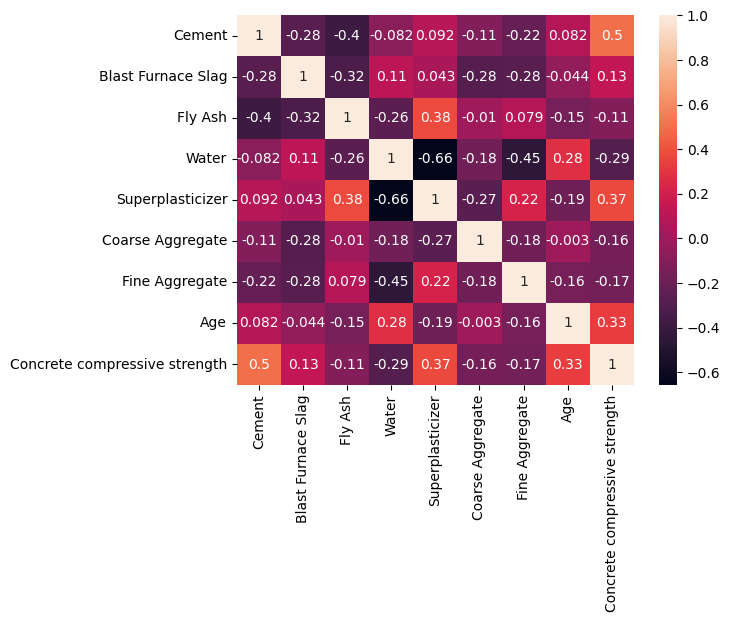

In [8]:
sns.heatmap(corr,annot= True)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [10]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,random_state=24,test_size = 0.3)

In [11]:
X_train.shape

(721, 8)

In [12]:
y_train.shape

(721, 1)

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
print(lr.intercept_,lr.coef_)

[-35.44918333] [[ 0.12726535  0.11257926  0.09835135 -0.13691381  0.23733402  0.02020436
   0.02616505  0.12251105]]


In [16]:
y_pred = lr.predict(X_test)

In [17]:
y_pred

array([[54.47850046],
       [37.97941266],
       [23.3895584 ],
       [46.92141674],
       [18.41184154],
       [27.20611505],
       [39.65541213],
       [59.71186219],
       [65.43100742],
       [17.28677446],
       [19.23480454],
       [34.01542405],
       [33.27419883],
       [23.41190559],
       [33.796402  ],
       [21.77434172],
       [20.34955077],
       [31.0448961 ],
       [25.44919638],
       [17.84735321],
       [33.70166348],
       [32.38428354],
       [19.25831983],
       [28.59809039],
       [53.95329902],
       [51.92401628],
       [30.91408158],
       [50.89052271],
       [51.8708808 ],
       [25.96584976],
       [52.16927923],
       [40.1812501 ],
       [37.09123912],
       [50.24796633],
       [25.8469632 ],
       [65.83820421],
       [27.94523602],
       [61.10376718],
       [34.21756708],
       [25.10024621],
       [50.6640619 ],
       [52.54406322],
       [54.30019071],
       [43.00011823],
       [34.54728425],
       [17

In [18]:
r2_score(y_test,y_pred)

0.5771752777048791

In [19]:
X.shape

(1030, 8)

In [20]:
y_pred=lr.predict(X_train)
r2_score= (y_test, y_pred)

In [21]:
r2_score

(      Concrete compressive strength
 496                           61.46
 258                           42.92
 882                           36.44
 401                           58.52
 517                           15.07
 ...                             ...
 967                           23.79
 232                           50.77
 1013                          40.87
 126                           60.29
 457                           39.27
 
 [309 rows x 1 columns],
 array([[37.75837969],
        [33.02713552],
        [29.23839614],
        [30.53416238],
        [24.41488311],
        [61.09866768],
        [54.49674838],
        [24.09293194],
        [55.10072561],
        [40.05274337],
        [50.17054753],
        [53.72683821],
        [22.92428399],
        [21.18770019],
        [69.02594526],
        [28.0183342 ],
        [34.10625149],
        [48.74748682],
        [26.07938828],
        [37.54499779],
        [29.01558868],
        [20.06299637],
        [36.24992565],
